<a href="https://colab.research.google.com/github/EduardoHCO/ProjetoXerox/blob/master/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Importação da biblioteca**

In [ ]:
import pandas as pd

##**Importação dos dados**

In [ ]:
titanic_dataset = pd.read_csv('train.csv')
titanic_dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


##**Informações**

In [ ]:
titanic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB




*   **Idade** possui 177 campos sem preenchimento
*   Das 891 pessoas 687 pessoas não estavam em **cabines**
*   2 pessoas sem local de **embarcação**











In [ ]:
titanic_dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200




*   Média de idade dos tripulantes é de 30 anos
*   Sendo o desvio padrão de 14 anos, portanto entre 15 a 45 anos eram a maior parte dos tribulantes



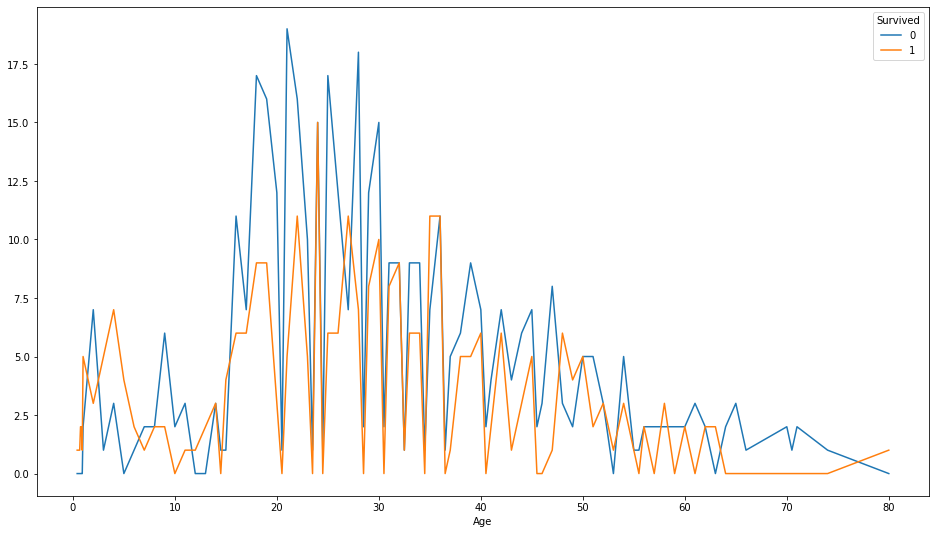

In [ ]:
plot_age_survived = pd.crosstab(titanic_dataset["Age"], titanic_dataset["Survived"])
plot_age_survived.plot(figsize=(16,9))



*   Neste plot é perceptível ver se a idade x teve mais mortos ou sobreviventes


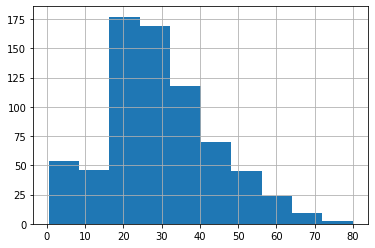

In [ ]:
titanic_dataset["Age"].hist()

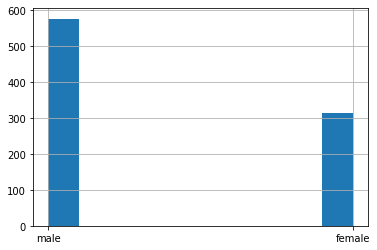

In [ ]:
titanic_dataset["Sex"].hist()


In [ ]:
homens = len(titanic_dataset[titanic_dataset["Sex"] == 'male'])
mulheres = len(titanic_dataset[titanic_dataset["Sex"] == 'female'])
homens, mulheres

(577, 314)



*   577 dos 891 tripulantes eram do **sexo masculino**
*   314 dos 891 tripulantes eram do **sexo feminino**



In [ ]:
sobreviventes = pd.crosstab(titanic_dataset["Survived"], titanic_dataset["Sex"])
sobreviventes

Sex,female,male
Survived,,
0,81,468
1,233,109




*   233 mulheres sobreviveram, 81 mulheres morreram
*   109 homens sobreviveram, 468 homens morreram



In [ ]:
criancas = len(titanic_dataset[titanic_dataset['Age'] <= 12])
adultos = len(titanic_dataset[(titanic_dataset['Age'] > 12) & (titanic_dataset['Age'] < 60)])
idosos = len(titanic_dataset[titanic_dataset['Age'] >= 60])
criancas, adultos, idosos

(69, 619, 26)



*   69 pessoas eram crianças
*   619 pessoas eram adultos
*   26 pessoas eram idosos



In [ ]:
titanic_dataset["Embarked"].unique()

embarked_c = len(titanic_dataset[titanic_dataset["Embarked"] == "C"])
embarked_s = len(titanic_dataset[titanic_dataset["Embarked"] == "S"])
embarked_q = len(titanic_dataset[titanic_dataset["Embarked"] == "Q"])
embarked_c, embarked_s, embarked_q

(168, 644, 77)



*   168 pessoas embarcaram no endereço C
*   644 pessoas embarcaram no endereço S
*   77 pessoas embarcaram no endereço Q
*   2 pessoas não tem identificação de local de embarque




In [ ]:
parentesco =  len(titanic_dataset[titanic_dataset["Parch"] == 1])
parentesco

118



*   Das 891 pessoas 209 possuem parentescos na embarcação




In [ ]:
titanic_dataset["Pclass"].unique()
pessoas_class_1 = len(titanic_dataset[titanic_dataset['Pclass'] == 1])
pessoas_class_2 = len(titanic_dataset[titanic_dataset['Pclass'] == 2])
pessoas_class_3 = len(titanic_dataset[titanic_dataset['Pclass'] == 3])
pessoas_class_1, pessoas_class_2, pessoas_class_3
# total_p_class = pessoas_class_1+pessoas_class_2+pessoas_class_3
# total_p_class

(216, 184, 491)

In [ ]:
mortos_classe_1 = len(titanic_dataset[(titanic_dataset['Survived'] == 0) & (titanic_dataset['Pclass'] == 1)])
mortos_classe_2 = len(titanic_dataset[(titanic_dataset['Survived'] == 0) & (titanic_dataset['Pclass'] == 2)])
mortos_classe_3 = len(titanic_dataset[(titanic_dataset['Survived'] == 0) & (titanic_dataset['Pclass'] == 3)])
porcentagem_mortos_classe_1 = ((mortos_classe_1 / pessoas_class_1) * 100)
porcentagem_mortos_classe_2 = ((mortos_classe_2 / pessoas_class_2) * 100)
porcentagem_mortos_classe_3 = ((mortos_classe_3 / pessoas_class_3) * 100)
porcentagem_mortos_classe_1, porcentagem_mortos_classe_2, porcentagem_mortos_classe_3


(37.03703703703704, 52.71739130434783, 75.76374745417516)



*   37% dos pessoas da classe 1 morreram
*   53% dos pessoas da classe 2 morreram
*   76% dos pessoas da classe 3 morreram



In [ ]:
titanic_dataset["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64



*   O ticket mais caro da embarcação foi de 512.329200

